# Reinforcement Learning Agent Simulation for N-Armed Bandit 

In [9]:
import random
from matplotlib import pyplot as plt
from statistics import mean 

random.seed(1)

class rl_util:
    def argmax(l):
        f = lambda i: l[i]
        return max(range(len(l)), key=f)

    def rand_vec(mu, sig):
        rvec = []
        for i in range(len(mu)):
            rvec.append(random.gauss(mu[i], sig[i]))
        return rvec

    def alpha_vec(k):
        alph = []
        for i in range(len(k)):
            alph.append(1/(k[i]+1))                        
        return alph

    def Q(alpha, r, q):
        return q + alpha * (r - q)

    def Q_vec(alvec, rvec, qvec):
        Qvec = []
        for i in range(len(alvec)):
            Qvec.append(rl_util.Q(alvec[i], rvec[i], qvec[i]))
        return Qvec


Enter N for N-armed-bandit: 3
Now enter n reward means: 
mean1 : 4
variance1 : 2
mean2 : 6
variance2 : 2
mean3 : 8
variance3 : 2
[3.7695170025991187, 6.3179749690844265, 8.147196679339029]
[3.7695170025991187, 6.3179749690844265, 8.125222282253576]
[3.7695170025991187, 6.3179749690844265, 8.125939302039157]
[3.7695170025991187, 6.3179749690844265, 8.126746970350007]
[3.7695170025991187, 6.3179749690844265, 8.126498393270461]
[3.7695170025991187, 6.3179749690844265, 8.142927855679433]
[3.7695170025991187, 6.3179749690844265, 8.114544545558191]
[3.7695170025991187, 6.3179749690844265, 8.125169840073054]
[3.7695170025991187, 6.3179749690844265, 8.1193304172479]
[3.7695170025991187, 6.3179749690844265, 8.117648886186672]


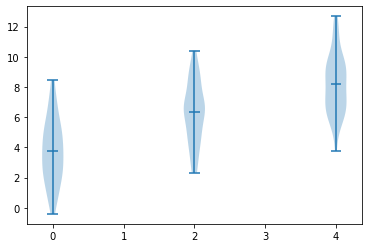

In [31]:
# greedy action

def n_armed_bandit_greedy(avec,svec, sz=1000):
    sample = 100
       
    rvec = [[random.gauss(avec[i], svec[i]) for k in range(sample)] for i in range(len(avec))]
    qvec = [mean(rvec[i]) for i in range(len(avec))]
    steps = [0 for i in range(len(avec))]    
    pos = [2*i for i in range(len(avec))]
    plt.violinplot(rvec, pos, widths=0.3, showmeans=True)
    
    for k in range(1, sz+1):       
        i = rl_util.argmax(qvec)                # take action 
        steps[i] += 1                           # increase step count for that bandit 
        rvec[i].append(random.gauss(avec[i], svec[i]))   # environment will generate next reward  
        qvec[i] = mean(rvec[i])                 # estimate value
        
        print(qvec)


if __name__ == '__main__':
    n = int(input("Enter N for N-armed-bandit: "))
    print("Now enter n reward means: ")
    avec = []
    svec = []
    for i in range(1, n+1):
        avec.append(int(input("mean{} : ".format(i))))
        svec.append(int(input("variance{} : ".format(i))))

    n_armed_bandit_greedy(avec,svec,10)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fbf77350ad0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7fbf7737af50>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fbf773188d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fbf77318d50>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fbf77318890>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7fbf77318d10>}

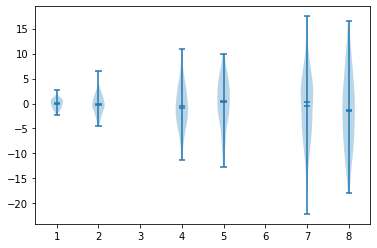

In [29]:
import numpy as np

fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]
plt.violinplot(data, pos, points=20, widths=0.3, showmeans=True, showextrema=True, showmedians=True)

In [8]:
avec = [2,5,7]
svec = [3,1,2]
steps = [0 for i in range(len(avec))]
qvec = [0 for i in range(len(avec))]
for k in range(1, 20):
        rvec = rl_util.rand_vec(avec,svec)
        qvec = rl_util.Q_vec(rl_util.alpha_vec(steps), rvec, qvec)
        i = rl_util.argmax(qvec)
        steps[i] += 1
        print(qvec, rl_util.alpha_vec(steps))
        

[2.4815140381379894, 5.303554707826984, 5.022327150050774] [1.0, 0.5, 1.0]
[3.760375141441411, 5.71020352448191, 6.128654959432034] [1.0, 0.5, 0.5]
[-2.300464190990397, 4.975691350399081, 7.325985485553] [1.0, 0.5, 0.3333333333333333]
[-3.2010915755093015, 4.941907281296738, 6.556651466938337] [1.0, 0.5, 0.25]
[1.6065966740668438, 4.84869284727435, 6.675416991839911] [1.0, 0.5, 0.2]
[6.503622188910202, 5.134701645441115, 7.273818691618019] [1.0, 0.5, 0.16666666666666666]
[1.5757618570896383, 4.827557518807074, 7.354452437103679] [1.0, 0.5, 0.14285714285714285]
[-6.507372360040112, 4.893834352057503, 7.349579171538933] [1.0, 0.5, 0.125]
[-1.7056262320406237, 5.179099787315027, 7.166070574014826] [1.0, 0.5, 0.1111111111111111]
[-5.377300570830871, 4.98289069847354, 6.930097011502784] [1.0, 0.5, 0.1]
[0.43821238219956093, 4.915303139884085, 7.18728238019927] [1.0, 0.5, 0.09090909090909091]
[2.3094445368247705, 4.9434087574502055, 7.2409847849388616] [1.0, 0.5, 0.08333333333333333]
[-3.436

In [ ]:
# epsilon greedy
